In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import altair as alt


In [2]:
milk_delivered_to_dairies = pd.read_csv("milk_delivered_to_dairies.csv")

In [3]:
milk_delivered_to_dairies.describe()

,Thousand_tonnes_to_dairies,Fat_content,Protein_content
count,1320.000000,1320.000000,1320.000000
mean,339.260864,4.160091,3.413000
std,159.565033,0.197506,0.123907
min,118.170000,3.270000,3.020000
25%,238.772500,4.070000,3.330000
50%,275.005000,4.195000,3.410000
75%,388.745000,4.280000,3.480000
max,1216.070000,4.900000,3.990000


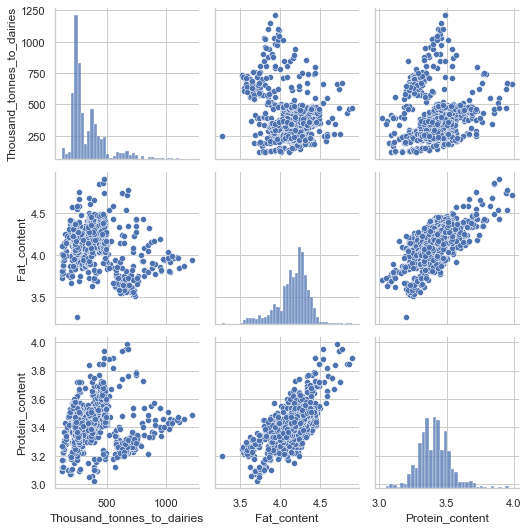

In [4]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(milk_delivered_to_dairies, height = 2.5)
plt.tight_layout()
plt.show()

In [5]:
year_list = ["2021M01","2021M02","2021M03","2021M04","2021M05","2021M06","2021M07","2021M08","2021M09","2021M10","2021M11","2021M12"]
milk_delivered_plot = milk_delivered_to_dairies[milk_delivered_to_dairies['TIME'].isin(year_list)]
milk_delivered_plot.head(10)

,TIME,Country,Thousand_tonnes_to_dairies,Fat_content,Protein_content
1260,2021M01,Belgium,372.92,4.34,3.50
1261,2021M01,Denmark,476.72,4.45,3.69
1262,2021M01,Ireland,187.62,4.42,3.51
1263,2021M01,Austria,268.01,4.35,3.50
1264,2021M01,Sweden,242.77,4.30,3.54
1265,2021M02,Belgium,343.61,4.33,3.48
1266,2021M02,Denmark,429.27,4.46,3.69
1267,2021M02,Ireland,362.85,4.45,3.44
1268,2021M02,Austria,252.81,4.29,3.46
1269,2021M02,Sweden,221.32,4.32,3.55


Text(0.5, 1.0, 'Fat_content_Milk_2021')

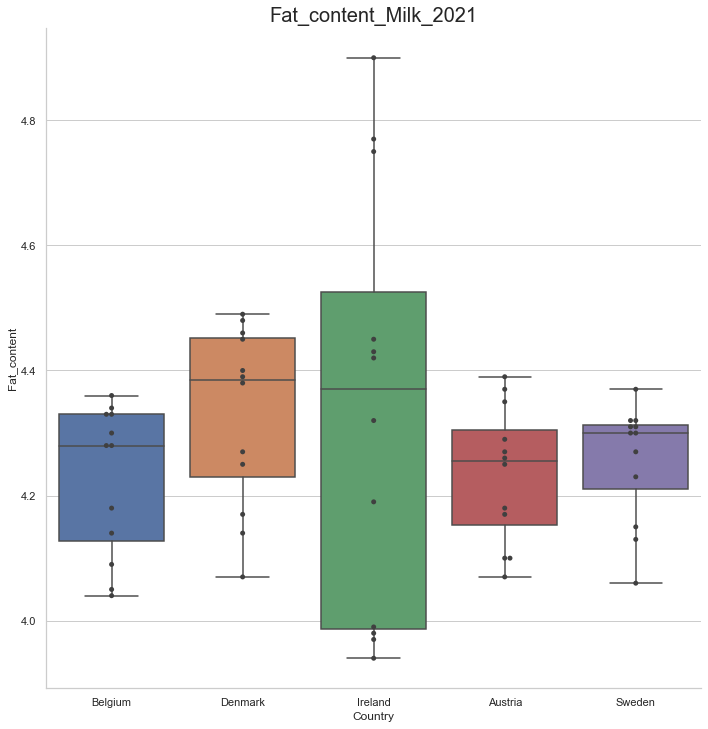

In [6]:
ax = sns.catplot(data=milk_delivered_plot, x='Country', y='Fat_content',kind='box',height =10)
ax = sns.swarmplot(data=milk_delivered_plot, x='Country', y='Fat_content',color=".25")
plt.title('Fat_content_Milk_2021', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Thousand_tonnes_to_dairies 2021')

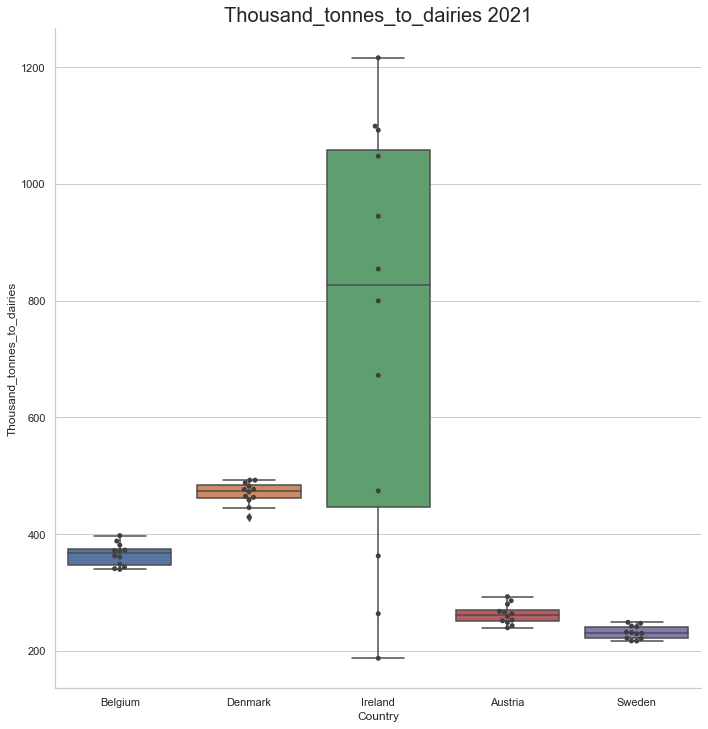

In [7]:
ax = sns.catplot(data=milk_delivered_plot, x='Country', y='Thousand_tonnes_to_dairies',kind='box',height =10)
ax = sns.swarmplot(data=milk_delivered_plot, x='Country', y='Thousand_tonnes_to_dairies',color=".25")
plt.title('Thousand_tonnes_to_dairies 2021', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Protein_content_Milk_2021')

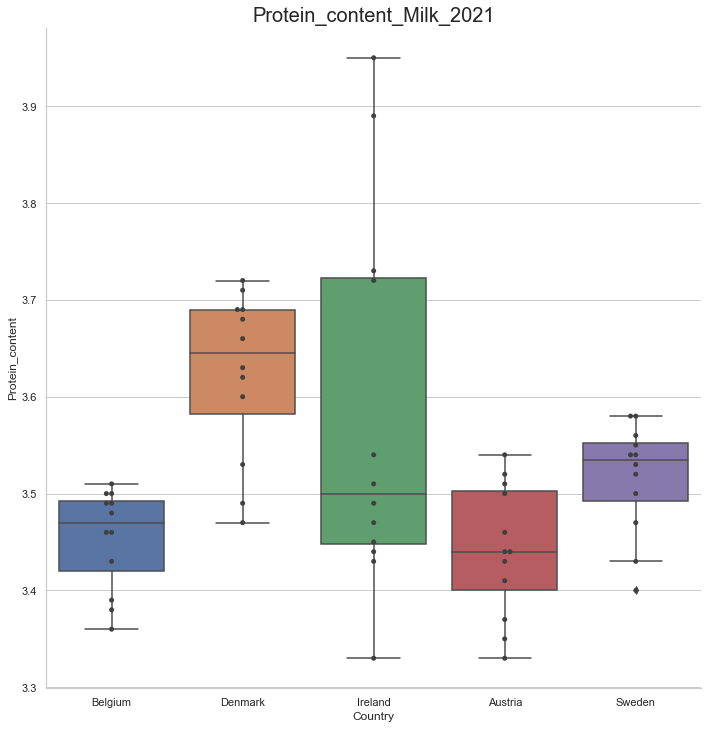

In [8]:
ax = sns.catplot(data=milk_delivered_plot, x='Country', y='Protein_content',kind='box',height =10)
ax = sns.swarmplot(data=milk_delivered_plot, x='Country', y='Protein_content',color=".25")
plt.title('Protein_content_Milk_2021', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Solid Contents 2000-2020')

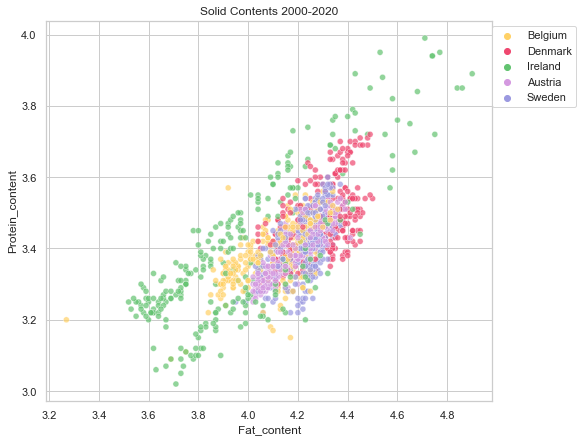

In [9]:
sns.set_palette(['#FFD166', '#EF476F', '#62C370','#D499E0','#9B99E0'])# Plot #FFD166
plt.figure(figsize=(8, 7))
sns.scatterplot(data=milk_delivered_to_dairies, x='Fat_content', y='Protein_content', alpha=0.7, hue='Country')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.title("Solid Contents 2000-2020")

In [10]:
alt.Chart(milk_delivered_to_dairies).mark_point().encode(
alt.X("Fat_content",scale=alt.Scale(zero=False)),
alt.Y("Protein_content",scale=alt.Scale(zero=False)),
alt.Size("Thousand_tonnes_to_dairies"),
alt.Color("Country:N"),
alt.OpacityValue(0.5),
alt.Order("Thousand_tonnes_to_dairies:Q",sort="descending"),
    tooltip=[
        alt.Tooltip("Country:N"),
        alt.Tooltip("Protein_content:Q"),
        alt.Tooltip("Fat_content:Q"),
        alt.Tooltip("Thousand_tonnes_to_dairies:Q")
    ]
)

alt.Chart(...)

In [11]:
#milk_delivered_to_dairies=milk_delivered_to_dairies.sample(frac = 0.6)
#milk_delivered_to_dairies.head() #statististics

# DELETE OUTLIERS

In [12]:
print("Highest allowed Fat content",milk_delivered_to_dairies['Fat_content'].mean() + 3*milk_delivered_to_dairies['Fat_content'].std())
print("Lowest allowed Fat content",milk_delivered_to_dairies['Fat_content'].mean() - 3*milk_delivered_to_dairies['Fat_content'].std())
print("Highest allowed Protein_content",milk_delivered_to_dairies['Protein_content'].mean() + 3*milk_delivered_to_dairies['Protein_content'].std())
print("Lowest allowed Protein_content",milk_delivered_to_dairies['Protein_content'].mean() - 3*milk_delivered_to_dairies['Protein_content'].std())

Highest allowed Fat content 4.752610171592406
Lowest allowed Fat content 3.567571646589413
Highest allowed Protein_content 3.784720871580355
Lowest allowed Protein_content 3.041279128419639


In [13]:
Fat_content = milk_delivered_to_dairies[(milk_delivered_to_dairies['Fat_content'] < 4.75) & (milk_delivered_to_dairies['Fat_content'] > 3.5)]
Protein_content = milk_delivered_to_dairies[(milk_delivered_to_dairies['Protein_content'] < 3.78) & (milk_delivered_to_dairies['Protein_content'] > 3.04)]

# VALIDATION NORMAL DISTRIBUTION

In [14]:
from scipy import stats

test1=stats.shapiro(Fat_content.Fat_content[Fat_content.Country=='Austria'])
test2=stats.shapiro(Fat_content.Fat_content[Fat_content.Country=='Denmark'])
test3=stats.shapiro(Fat_content.Fat_content[Fat_content.Country=='Sweden'])
test4=stats.shapiro(Fat_content.Fat_content[Fat_content.Country=='Ireland'])
test5=stats.shapiro(Fat_content.Fat_content[Fat_content.Country=='Austria'])

print(test1,test2,test3,test4,test5)

ShapiroResult(statistic=0.9529129862785339, pvalue=1.5662554631035164e-07) ShapiroResult(statistic=0.955009937286377, pvalue=2.735416728683049e-07) ShapiroResult(statistic=0.9312826991081238, pvalue=1.004274219340573e-09) ShapiroResult(statistic=0.962272047996521, pvalue=2.622247620820417e-06) ShapiroResult(statistic=0.9529129862785339, pvalue=1.5662554631035164e-07)


In [15]:
test1=stats.shapiro(Protein_content.Protein_content[Protein_content.Country=='Austria'])
test2=stats.shapiro(Protein_content.Protein_content[Protein_content.Country=='Denmark'])
test3=stats.shapiro(Protein_content.Protein_content[Protein_content.Country=='Sweden'])#no
test4=stats.shapiro(Protein_content.Protein_content[Protein_content.Country=='Ireland'])
test5=stats.shapiro(Protein_content.Protein_content[Protein_content.Country=='Austria'])
#test6=stats.shapiro(dairy_production.Fat_content[dairy_production.Country=='European Union'])

print(test1,test2,test3,test4,test5)

ShapiroResult(statistic=0.9623348712921143, pvalue=2.1693565486202715e-06) ShapiroResult(statistic=0.9717854261398315, pvalue=4.418048047227785e-05) ShapiroResult(statistic=0.9896053075790405, pvalue=0.05579714849591255) ShapiroResult(statistic=0.9606306552886963, pvalue=2.6161278583458625e-06) ShapiroResult(statistic=0.9623348712921143, pvalue=2.1693565486202715e-06)


In [16]:
test1=stats.shapiro(milk_delivered_to_dairies.Thousand_tonnes_to_dairies[milk_delivered_to_dairies.Country=='Austria'])#no
test2=stats.shapiro(milk_delivered_to_dairies.Thousand_tonnes_to_dairies[milk_delivered_to_dairies.Country=='Denmark'])#yes
test3=stats.shapiro(milk_delivered_to_dairies.Thousand_tonnes_to_dairies[milk_delivered_to_dairies.Country=='Sweden'])#no
test4=stats.shapiro(milk_delivered_to_dairies.Thousand_tonnes_to_dairies[milk_delivered_to_dairies.Country=='Ireland'])#yes
test5=stats.shapiro(milk_delivered_to_dairies.Thousand_tonnes_to_dairies[milk_delivered_to_dairies.Country=='Austria'])#no

print(test1,test2,test3,test4,test5)

ShapiroResult(statistic=0.9755744338035583, pvalue=0.00016912139835767448) ShapiroResult(statistic=0.947249174118042, pvalue=3.71888759786998e-08) ShapiroResult(statistic=0.9769974946975708, pvalue=0.00028652214678004384) ShapiroResult(statistic=0.9583151936531067, pvalue=6.79199956721277e-07) ShapiroResult(statistic=0.9755744338035583, pvalue=0.00016912139835767448)


In [17]:
#drinking_mil=milk_delivered_to_dairies.query("Country=='Sweden'")


#sns.distplot(drinking_mil.Thousand_tonnes_to_dairies, kde=False, bins=100)


In [18]:
columnas_numericas = Fat_content.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(milk_delivered_to_dairies[num_col])
    if(pval < 0.05):
        print("Columna {} no follow a normal distribution".format(num_col))
    else:
        print("Columna {} follow a normal distribution".format(num_col))

Columna Thousand_tonnes_to_dairies no follow a normal distribution
Columna Fat_content no follow a normal distribution
Columna Protein_content no follow a normal distribution


# ANOVA (Equality OF VARIANCES)

In [19]:
Austria=Fat_content.Fat_content[Fat_content.Country=='Austria']
Belgium=Fat_content.Fat_content[Fat_content.Country=='Belgium']
Ireland=Fat_content.Fat_content[Fat_content.Country=='Ireland']
Denmark=Fat_content.Fat_content[Fat_content.Country=='Denmark']
Sweden=Fat_content.Fat_content[Fat_content.Country=='Sweden']

sd1 = Austria.std()
sd2 = Belgium.std()
sd3 = Ireland.std()
sd4 = Denmark.std()
sd5= Sweden.std()
print(sd1,sd2,sd3,sd4,sd5)
#east = dataset.charges[dataset.region == "east"]

0.10392819690422823 0.13260006235349475 0.28193524109483203 0.11482940326371215 0.08192351929801432


In [20]:
from scipy.stats import levene
levene(Belgium,Ireland,Austria,Sweden, center='mean')#THERE IS NOT A EQUALITY OF VARIANCES

LeveneResult(statistic=159.73757132007103, pvalue=3.1245019226725383e-85)

In [21]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('Fat_content~Country', data = milk_delivered_to_dairies).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

              df     sum_sq   mean_sq           F        PR(>F)
Country      4.0  14.037344  3.509336  123.339475  1.929237e-89
Residual  1315.0  37.415245  0.028453         NaN           NaN


In [22]:
Austria=Protein_content.Protein_content[Protein_content.Country=='Austria']
Belgium=Protein_content.Protein_content[Protein_content.Country=='Belgium']
Ireland=Protein_content.Protein_content[Protein_content.Country=='Ireland']
Denmark=Protein_content.Protein_content[Protein_content.Country=='Denmark']
Sweden=Protein_content.Protein_content[Protein_content.Country=='Sweden']

sd1 = Austria.std()
sd2 = Belgium.std()
sd3 = Ireland.std()
sd4 = Denmark.std()
sd5= Sweden.std()
print(sd1,sd2,sd3,sd4,sd5)

#east = dataset.charges[dataset.region == "east"]

0.07483098250009021 0.08184684113543036 0.16962753237255176 0.10016588815741083 0.08143289858528546


In [23]:
from scipy.stats import levene
levene(Austria,Belgium,Denmark, center='mean')

LeveneResult(statistic=9.533385944636693, pvalue=8.108455612411664e-05)

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('Protein_content~Country', data = milk_delivered_to_dairies).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

              df     sum_sq   mean_sq          F        PR(>F)
Country      4.0   1.594062  0.398515  28.089349  2.044976e-22
Residual  1315.0  18.656458  0.014187        NaN           NaN


In [25]:
pg.homoscedasticity(Protein_content, dv="Protein_content", group="Country",method="levene")

,W,pval,equal_var
levene,60.121114,1.257277e-46,False


In [26]:
pg.homoscedasticity(milk_delivered_to_dairies, dv="Protein_content", group="Country",method="levene")

,W,pval,equal_var
levene,81.641857,6.039318e-62,False


In [27]:
#there is no support to apply Anova test.

# t- test

In [28]:
Ireland_F=milk_delivered_to_dairies.Fat_content[milk_delivered_to_dairies.Country=='Ireland']
Ireland_P=milk_delivered_to_dairies.Protein_content[milk_delivered_to_dairies.Country=='Ireland']
Denmark_F=milk_delivered_to_dairies.Fat_content[milk_delivered_to_dairies.Country=='Denmark']
Denmark_P=milk_delivered_to_dairies.Protein_content[milk_delivered_to_dairies.Country=='Denmark']


In [29]:
stats.ttest_1samp(Ireland_F,4.02) 

Ttest_1sampResult(statistic=-1.4452683233927872, pvalue=0.1495729886974444)

In [30]:
stats.ttest_1samp(Ireland_P,3.47)

Ttest_1sampResult(statistic=-5.97806911091508, pvalue=7.32696394311228e-09)

# Two_Populations

In [31]:
test = stats.ttest_ind(Denmark_F, Ireland_F, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=14.826016555363427, pvalue=1.2132375543198174e-38)

In [32]:
test = stats.ttest_ind(Denmark_P, Ireland_P, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=6.139707447890742, pvalue=2.0737830591146353e-09)